<div class="markdown-google-sans">

## Ciencia de datos
</div>

Con Colab, puedes aprovechar toda la potencia de las bibliotecas más populares de Python para analizar y visualizar datos. La celda de código de abajo utiliza <strong>NumPy</strong> para generar datos aleatorios y <strong>Matplotlib</strong> para visualizarlos. Para editar el código, solo tienes que hacer clic en la celda.

Puedes importar tus propios datos a los cuadernos de Colab desde tu cuenta de Google Drive, incluidas las hojas de cálculo, y también desde GitHub y muchas fuentes más.

In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
x = np.linspace(0, 5, 10) # diez puntos entre 0 y 5
y = x ** 2 # exponente 2 de todos los puntos de x
print(x)
print(y)

[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
[ 0.          0.30864198  1.2345679   2.77777778  4.9382716   7.71604938
 11.11111111 15.12345679 19.75308642 25.        ]


Text(0.5, 1.0, 'title')

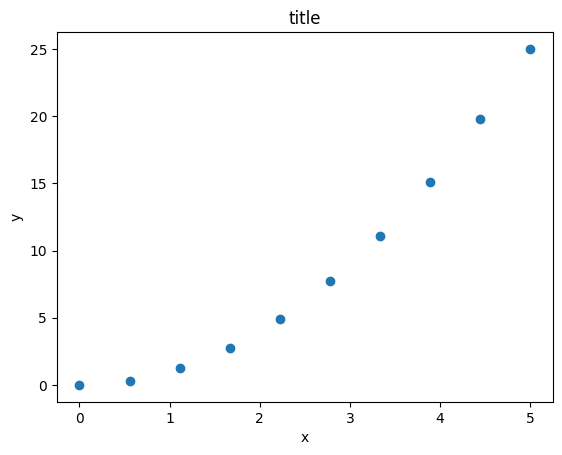

In [46]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')

ejemplo de solución

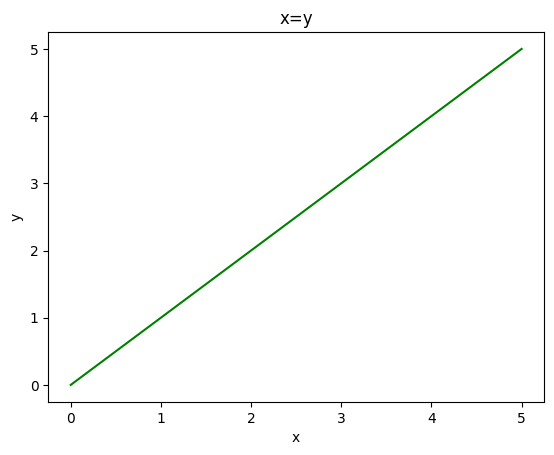

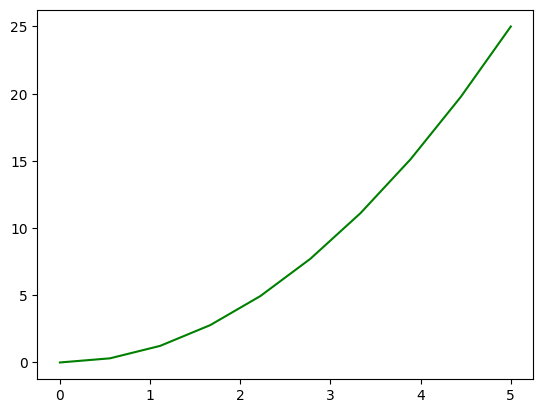

In [47]:
# ============================================================================
# ejercicio 1
# dibuja la figura x=y arriba
# ============================================================================
plt.plot(x, y, 'g')


# Pandas

In [48]:
import pandas as pd

El siguiente dataset viene de muestra dentro de Google Colab, y describe información poblacional e inmobiliaria de California.

In [49]:
# Importamos un archivo CSV que viene de ejemplo en Google Colab
df_casas = pd.read_csv('sample_data/california_housing_test.csv')
df_casas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [50]:
# Importamos un archivo de Excel que está en un repositorio en GitHub
df_titanic = pd.read_excel('https://raw.githubusercontent.com/GabrielMissael/'+
                           'cdecmx/gh-pages/assets/datasets/Titanic.xlsx')

# Podemos ver el inicio de un DataFrame con .head()
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Finalmente, datos de: [Wikipedia - World population](https://en.wikipedia.org/wiki/World_population), sobre los 10 países más densamente poblados en el mundo.

In [51]:
# Podemos importar tablas que estén en páginas Web como wikipedia
tabla_poblacion = pd.read_html('https://en.wikipedia.org/wiki/World_population',
                            match = '10 most densely populated countries')

df_poblacion = tabla_poblacion[0].set_index('Country')
df_poblacion

,Rank,Population,Area (km2),Density (pop/km2)
Country,,,,
Singapore,1,5921231,719,8235
Bangladesh,2,165650475,148460,1116
Palestine[note 3][102],3,5223000,6025,867
Taiwan[note 4],4,23580712,35980,655
South Korea,5,51844834,99720,520
Lebanon,6,5296814,10400,509
Rwanda,7,13173730,26338,500
Burundi,8,12696478,27830,456
Israel,9,9402617,21937,429


## Series y DataFrames.

Como ya mencionamos, una Series se puede entender como una **tabla con una sola columna**, aunque también puedes verla como una lista donde cada elemento tiene una etiqueta, un **índice** el cual por default es un número entero de la posición del elemento.

<center>
    <img width="12%" src="https://pandas.pydata.org/docs/_images/01_table_series.svg">
</center>
Para crear una serie partiendo de una lista:


In [52]:
serie = pd.Series(['Hola', 3.1416, 'A'])

# Imprimimos la serie que creamos
print(serie)

# Información de la serie
print("\nTipo de dato: ", type(serie))
print("Tamaño: ", serie.size)

0      Hola
1    3.1416
2         A
dtype: object

Tipo de dato:  <class 'pandas.core.series.Series'>
Tamaño:  3


Observamos cómo cada elemento de la lista ahora tiene un índice. Podemos especificar el índice explícitamente:

In [53]:
serie = pd.Series(data = ['Aaa', 'Bbb', 'Ccc'],
                  index = ['Elemento 1', 'Elemento 2', 'Elemento 2'])

print(serie)

# Podemos obtener un elemento con su índice
print(serie['Elemento 1'])


Elemento 1    Aaa
Elemento 2    Bbb
Elemento 2    Ccc
dtype: object
Aaa


Los **DataFrames** son más complejos que las Series, ya que ahora tenemos una **tabla con varias columnas**. En este caso, tendremos **índices** para cada fila y también etiquetas para las **columnas**. Los valores default son también enteros que indican la posición.

<center>
    <img width="30%" src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">
</center>


In [54]:
# Creemos DataFrame con una matriz aleatoria.
df = pd.DataFrame(data = np.random.rand(3, 4))

print("Tipo: ", type(df)) # Tipo de objeto
print("Tamaño: ", df.size)  #El tamaño es igual al número de celdas
df # Visualizamos el DataFrame completo

Tipo:  <class 'pandas.core.frame.DataFrame'>
Tamaño:  12


,0,1,2,3
0,0.643003,0.873494,0.746931,0.430672
1,0.000428,0.955145,0.808221,0.175826
2,0.807723,0.108149,0.979204,0.299365


In [55]:
# Podemos crear DataFrames a partir de diccionarios CUADRADOS
df_dict = pd.DataFrame({
    'Nombre':['Juan', 'María', 'Guadalupe'],
    'Edad':[18, 22, 34],
    'Altura':[1.73, 1.80, 1.50],},
    index = ['Persona 1', 'Persona 2', 'Persona 3']) # Especificamos índice
df_dict

,Nombre,Edad,Altura
Persona 1,Juan,18,1.73
Persona 2,María,22,1.80
Persona 3,Guadalupe,34,1.50


Ejercicio:
- Crea un DataFrame con una matriz de ceros con dimensión (5, 4)
- Asigna números enteros pares como índice.
- Asigna letras como columnas.

In [56]:
# To-Do


## Revisando los datos.

Para visualizar los datos de un DataFrame, tenemos dos opciones:

```python
# Mostramos las primeras 7 filas.
df.head(n = 7)

# Mostramos las últimas 4 filas.
df.tail(n = 4)
```
Si queremos ver un DataFrame completo, lo ponemos solo en una celda.

```python
# Para ver todo el DataFrame
df
```
Si el DataFrame es muy grande, no se podrá visualizar completo. Veamos los primeros tres y los últimos cuatro elementos del DataFrame de los datos que cargamos del Titanic.


In [57]:
df_titanic.head(n = 3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Además de consultar partes del DataFrame, también podemos consultar las etiquetas en las **filas** y las **columnas**, así como todos los **valores** del DataFrame.

```python
columnas = df.columns  # Obtenemos columnas
indice = df.index  # Obtenemos filas
valores = df.values  # Obtenemos valores
```
Veamos un ejemplo de esto:


In [58]:
columnas = df_dict.columns
filas = df_dict.index
valores = df_dict.values

print('Columnas: ', columnas, '\nFilas: ', filas)
print(valores, type(valores))  # Los valores son una matriz de NumPy!!

df_dict   # Recordamos el DataFrame de donde obtenemos estos valores

Columnas:  Index(['Nombre', 'Edad', 'Altura'], dtype='object') 
Filas:  Index(['Persona 1', 'Persona 2', 'Persona 3'], dtype='object')
[['Juan' 18 1.73]
 ['María' 22 1.8]
 ['Guadalupe' 34 1.5]] <class 'numpy.ndarray'>


,Nombre,Edad,Altura
Persona 1,Juan,18,1.73
Persona 2,María,22,1.80
Persona 3,Guadalupe,34,1.50


In [59]:
df_poblacion.describe()

,Rank,Population,Area (km2),Density (pop/km2)
count,10.00000,1.000000e+01,1.000000e+01,10.00000
mean,5.50000,1.682427e+08,3.664672e+05,1371.00000
std,3.02765,4.319508e+08,1.027321e+06,2422.01413
min,1.00000,5.223000e+06,7.190000e+02,423.00000
25%,3.25000,6.791578e+06,1.328425e+04,467.00000
50%,5.50000,1.293510e+07,2.708400e+04,514.50000
75%,7.75000,4.477880e+07,8.378500e+04,814.00000
max,10.00000,1.389637e+09,3.287263e+06,8235.00000


## Selección de datos por etiqueta.

Podemos seleccionar una o varias **columnas** específicas de un DataFrame utilizando las etiquetas. Se crea un nuevo **DataFrame** con las columnas especificadas.

<center>
    <img width="60%" src="https://pandas.pydata.org/docs/_images/03_subset_columns.svg">
</center>

De manera similar, podemos seleccionar **filas** utilizando el índice. Podemos seleccionar una o varias filas y se crea también un nuevo **DataFrame**

<center>
    <img width="70%" src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">
</center>

Para seleccionar utilizando las **etiquetas** (nombres de filas y columnas) usamos el método **loc()**. Funciona como sigue:

```python
# Seleccionamos una sola columna.
serie_columna = df.loc[:, ['Columna1']]

# Seleccionamos más de una columna.
df_columnas = df.loc[:, ['Columna1','Columna2']]

# Seleccionamos más de una fila.
df_filas = df.loc[['Indice1', 'Indice2'], :]
```
Es importante notar que esta selección no afecta al DataFrame original, y que además lo que no se selecciona se conserva (por ejemplo, al seleccionar una sola columna, el nuevo DataFrame conserva todas las filas). Veamos un ejemplo con los datos de densidad poblacional.


In [60]:
# Seleccionamos dos columnas
rank_densidad = df_poblacion.loc[:,['Rank', 'Density (pop/km2)']]
rank_densidad.head()

,Rank,Density (pop/km2)
Country,,
Singapore,1,8235
Bangladesh,2,1116
Palestine[note 3][102],3,867
Taiwan[note 4],4,655
South Korea,5,520


In [61]:
# Seleccionamos una sola columna
poblacion = df_poblacion.loc[:,['Population']]
poblacion

,Population
Country,
Singapore,5921231
Bangladesh,165650475
Palestine[note 3][102],5223000
Taiwan[note 4],23580712
South Korea,51844834
Lebanon,5296814
Rwanda,13173730
Burundi,12696478
Israel,9402617


In [62]:
# Seleccionamos solo 3 países (3 filas)
paises_seleccionados = df_poblacion.loc[['India', 'Rwanda', 'Israel'],:]
paises_seleccionados

,Rank,Population,Area (km2),Density (pop/km2)
Country,,,,
India,10,1389637446,3287263,423
Rwanda,7,13173730,26338,500
Israel,9,9402617,21937,429


También puedes seleccionar al mismo tiempo columnas y filas:

<center>
    <img width="70%" src="https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg">
</center>

Ejercicio:
- Del DataFrame de densidad poblacional, filtra las columnas de población y área, y las filas de Singapore, Bangladesh y Lebanon.

In [63]:
# To-Do


## Selección de datos por posición.

En la sección anterior, seleccionamos dado a **etiquetas**, esto es, con los nombres de las filas y las columnas. Podemos hacer lo mismo pero está vez con la **posición**. Para esto, en lugar de **loc()** y **at()**, usamos **iloc()** y **iat()**.

```python
# Seleccionamos las primeras 2 columnas.
df_columnas = df.iloc[:, 0:1]

# Seleccionamos las últimas 3 filas
df_filas = df.iloc[-3:, :]

# Elemento unico
dato = df.iat[0, 0]
```
Retomamos el ejemplo con la densidad de población.


In [64]:
poblacion_area = df_poblacion.iloc[:, 1:3]
poblacion_area.head(3)

,Population,Area (km2)
Country,,
Singapore,5921231,719
Bangladesh,165650475,148460
Palestine[note 3][102],5223000,6025


In [65]:
tres_paises = df_poblacion.iloc[-3:, :]
tres_paises

,Rank,Population,Area (km2),Density (pop/km2)
Country,,,,
Burundi,8,12696478,27830,456
Israel,9,9402617,21937,429
India,10,1389637446,3287263,423


In [66]:
dato = df_poblacion.iat[3, 3]
print(dato)

655


## Bonus: Gráficas en pandas.

Podemos gráficar fácilmente los datos en un DataFrame:

```python
# Gráfica de linea
df.plot(x = 'Columna1', y = 'Columna2')

# Gráfica de puntos
df.plot.scatter(x = 'Columna1', y = 'Columna2')
```



<Axes: xlabel='Rank'>

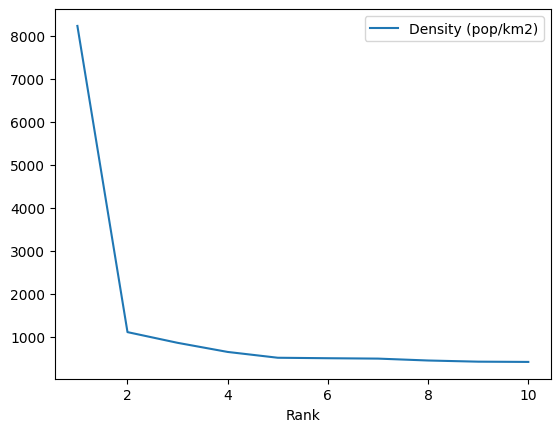

In [68]:
df_poblacion.plot(x = 'Rank', y = 'Density (pop/km2)')

<Axes: xlabel='population', ylabel='total_rooms'>

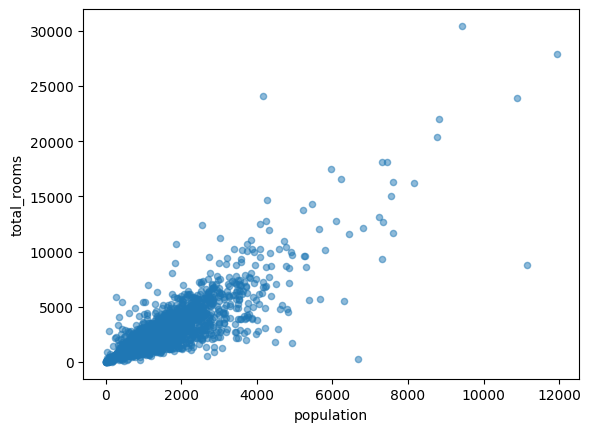

In [69]:
df_casas.plot.scatter(x = 'population', y = 'total_rooms', alpha = 0.5)